In [ ]:
!sudo apt-get install autoconf
!sudo apt-get install libtool
!sudo apt-get install liblapack-dev libblas-dev libfftw3-dev
!rm -rf itpp
!git clone https://github.com/iamviji/itpp.git # original one had compilation issue, did minor signle line change after forking
!ls;cd itpp;ls;mkdir -p build1 build2; cd build1 ; cmake cmake ..;make ;make install
!rm -rf py-itpp
!git clone https://github.com/vidits-kth/py-itpp.git



Reading package lists... Done
Building dependency tree       
Reading state information... Done
autoconf is already the newest version (2.69-11.1).
autoconf set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libtool-doc gcj-jdk
The following NEW packages will be installed:
  libtool
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 161 kB of archives.
After this operation, 1,227 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Fetched 161 kB in 1s (126 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable 

In [ ]:
!pip3 install pybind11
!cd py-itpp;./install_prerequisites_python3.sh;make install;pip3 install -e .
!cd py-itpp; ls ; pip3 install -e .
!cat py-itpp/setup.py
#following 3 lines are added to resolve the issue
import sys
sys.path.append('./py-itpp/lib')
!cp -rf py-itpp/lib/itpp py-itpp/lib/pyitpp # import itpp is not working, after this hack i started to work


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 16.9 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,010 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,047 kB]
Get:11 http://archive.ubuntu

In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
import pyitpp as itpp
from matplotlib import pyplot as plt
import cmath

In [ ]:
def rs_PSK(snr_db, block_size, numofMod):
  
  rs = itpp.comm.Reed_Solomon(3,2,False,1)
  #rate=rs.get_rate()
  rate=1
  '''Generate random bits'''
  nrof_bits = 3 * 10000 * block_size
  source_bits = itpp.randb(nrof_bits)
  print(source_bits)

  '''Encode the bits'''
  encoded_bits = rs.encode(source_bits)
  print(encoded_bits)
  
  
  print(encoded_bits.length())


  '''Modulate the bits'''

  modulator_ = itpp.comm.PSK(numofMod)
  tx_signal = modulator_.modulate_bits(encoded_bits)


  '''
  modulator_ = itpp.comm.modulator_2d()
  constellation = itpp.cvec('-1-0i, 1+0i')
  symbols = itpp.ivec('0, 1')
  modulator_.set(constellation, symbols)
  tx_signal = modulator_.modulate_bits(source_bits) 
  print(type(tx_signal[0]))
  '''

  
  '''Add the effect of channel to the signal'''
  
  noise_variance = (10 ** ((0-snr_db) * 0.1))/rate
  channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
  rx_signal = channel(tx_signal)
  



  '''
  noise_variance = 1.0 / (rate * pow(10, 0.1 * snr_db))
  noise = itpp.randn_c(tx_signal.length())
  noise *= itpp.math.sqrt(noise_variance)
  rx_signal = tx_signal + noise
  '''
  x=[]
  y=[]
  for i in range(rx_signal.length()):
    x.append(rx_signal[i].real)
    y.append(rx_signal[i].imag)


  plt.scatter(x, y, s=0.2)
  plt.ylabel('Imaginary')
  plt.xlabel('Real')
  plt.show()

    
  '''Demodulate the signal'''
  demodulated_bits = modulator_.demodulate_bits(rx_signal)

  '''Decode the received bits'''
  decoded_bits = rs.decode(demodulated_bits)

  '''Calculate the block error ratio'''
  blerc = itpp.comm.BLERC(block_size)
  blerc.count(source_bits, decoded_bits)
  print("BLER for %d PSK" %numofMod)
  print(blerc.get_errorrate())

In [ ]:
def rs_QAM(snr_db, block_size, numofMod):
  
  rs = itpp.comm.Reed_Solomon(3,2,False,1)
  #rate=rs.get_rate()
  #print(rate)
  rate=1
  '''Generate random bits'''
  nrof_bits = 3 * 10000 * block_size
  source_bits = itpp.randb(nrof_bits)
    
  '''Encode the bits'''
  encoded_bits = rs.encode(source_bits)

  '''Modulate the bits'''

  modulator_ = itpp.comm.QAM(numofMod)
  tx_signal = modulator_.modulate_bits(encoded_bits)


  '''
  modulator_ = itpp.comm.modulator_2d()
  constellation = itpp.cvec('-1-0i, 1+0i')
  symbols = itpp.ivec('0, 1')
  modulator_.set(constellation, symbols)
  tx_signal = modulator_.modulate_bits(source_bits) 
  print(type(tx_signal[0]))
  '''

  
  '''Add the effect of channel to the signal'''
  
  noise_variance = (10 ** ((0-snr_db) * 0.1))/rate
  channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
  rx_signal = channel(tx_signal)
  



  '''
  noise_variance = 1.0 / (rate * pow(10, 0.1 * snr_db))
  noise = itpp.randn_c(tx_signal.length())
  noise *= itpp.math.sqrt(noise_variance)
  rx_signal = tx_signal + noise
  '''
  x=[]
  y=[]
  for i in range(rx_signal.length()):
    x.append(rx_signal[i].real)
    y.append(rx_signal[i].imag)


  plt.scatter(x, y, s=0.2)
  plt.ylabel('Imaginary')
  plt.xlabel('Real')
  plt.show()

    
  '''Demodulate the signal'''
  demodulated_bits = modulator_.demodulate_bits(rx_signal)

  '''Decode the received bits'''
  decoded_bits = rs.decode(demodulated_bits)

  '''Calculate the block error ratio'''
  blerc = itpp.comm.BLERC(block_size)
  blerc.count(source_bits, decoded_bits)
  print("BLER for %d QAM" %numofMod)
  print(blerc.get_errorrate())

[1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1

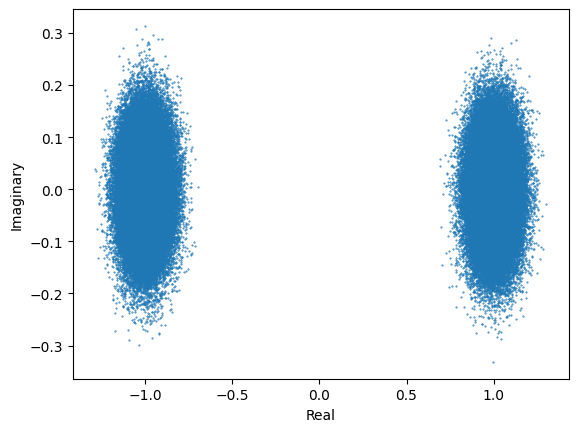

BLER for 2 PSK
0.0
[1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 

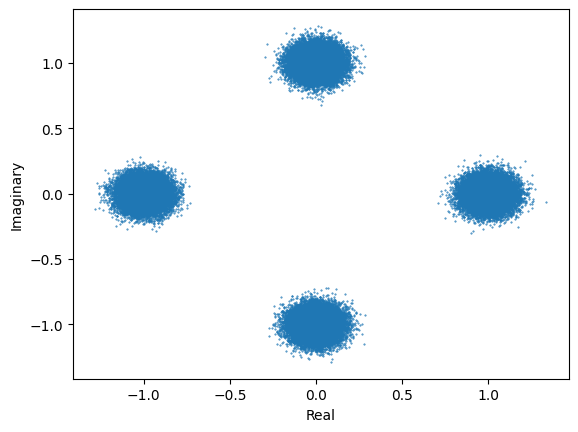

BLER for 4 PSK
0.0
[1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 

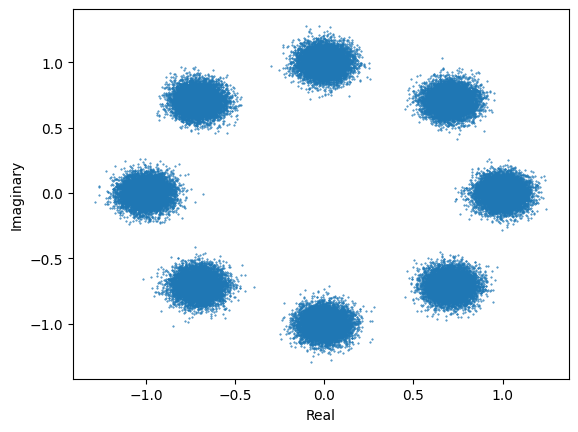

BLER for 8 PSK
0.0


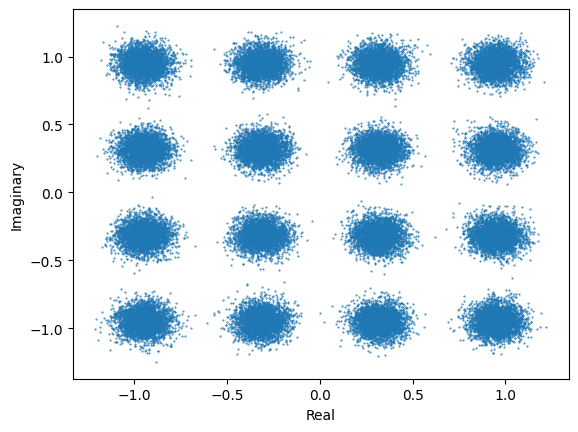

BLER for 16 QAM
0.0


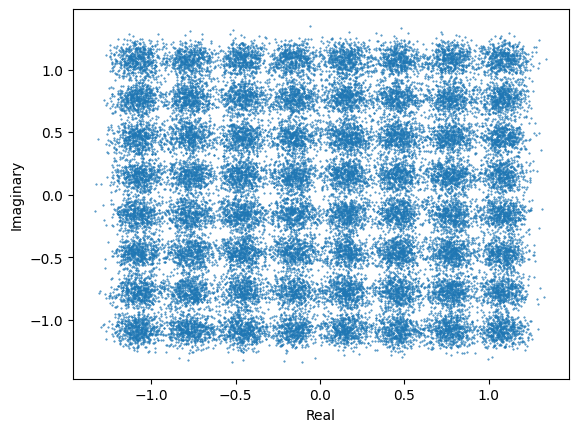

BLER for 64 QAM
0.0001


In [ ]:
snr_db = 20
block_size = 3


rs_PSK(snr_db, block_size, 2)
rs_PSK(snr_db, block_size, 4)
rs_PSK(snr_db, block_size, 8)
rs_QAM(snr_db, block_size, 16)
rs_QAM(snr_db, block_size, 64)


